In [1]:
import os
import sys
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm # progress bars :)
tqdm.pandas()

sns.set_context("paper")

In [2]:
pd.__version__

'0.24.2'

In [3]:
# Import Simulated Data with MRCC Values

In [4]:
%%bash
mkdir -p ../data
curl -L https://osf.io/e258u/download -o ../data/simreads-compare.dnainput.processed.mrcc.csv.gz
ls ../data

simreads-compare.dnainput.csv.gz
simreads-compare.dnainput.processed.csv.gz
simreads-compare.dnainput.processed.mashD.csv.gz
simreads-compare.dnainput.processed.mrcc.csv.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1275      0 --:--:-- --:--:-- --:--:--  1275
100 11.1M  100 11.1M    0     0  5615k      0  0:00:02  0:00:02 --:--:-- 7020k


In [5]:
sDF = pd.read_csv("../data/simreads-compare.dnainput.processed.mrcc.csv.gz")
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,4974666,5189923,1637423,dna-21,5082294.5,0.047855,0.051308,0.051773
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,49849,52176,16567,dna-21,5082294.5,0.047855,0.050323,0.051893
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,5001,5163,1717,dna-21,5082294.5,0.047855,0.047708,0.051601
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,2494,2590,858,dna-21,5082294.5,0.047855,0.046926,0.052235
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,4974660,5189923,993907,dna-31,5082291.5,0.047855,0.050369,0.050880


In [6]:
sDF.shape

(273600, 18)

In [7]:
# first, let's get the simulation info from the comparison name

sDF["nt-freq"] = sDF["comparison_name"].str.extract(r"-(f\d)-")
sDF["model"] = sDF["comparison_name"].str.extract(r"-f\d-(\w*)-")
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,sig1_hashes,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,nt-freq,model
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,4974666,5189923,1637423,dna-21,5082294.5,0.047855,0.051308,0.051773,f1,nogam
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,49849,52176,16567,dna-21,5082294.5,0.047855,0.050323,0.051893,f1,nogam
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,5001,5163,1717,dna-21,5082294.5,0.047855,0.047708,0.051601,f1,nogam
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,2494,2590,858,dna-21,5082294.5,0.047855,0.046926,0.052235,f1,nogam
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,4974660,5189923,993907,dna-31,5082291.5,0.047855,0.050369,0.050880,f1,nogam


## Simulation Parameters

#### Nucleotide substitution frequencies
- **f1: equal frequencies**, i.e. freq(A) = freq(C) = freq(G) = freq(T) = 0.25, 
- **f2: GC-rich**, i.e. freq(A) = 0.1, freq(C) = 0.3, freq(G) = 0.4, freq(T) = 0.2, 
- **f3: AT-rich**, i.e. freq(A) = freq(T) = 0.4, freq(C) = freq(G) = 0.1.

#### Evolutionary model
- **nogam**: GTR (six relative rates of nucleotide substitution)
- **gamma**: GTR+Γ (six rates and one Γ shape parameter)

#### Simulated Distances
- 0.05 --> 1.0 (stepping by 0.05)

In [8]:
# as a reminder, we have all the simulation info in a file "../simreads-info.csv.gz"
siminfo = pd.read_csv("../simreads-info.csv.gz")
siminfo.head()

,name,seed,freq(T),freq(C),freq(A),freq(G),rate(C-T),rate(A-T),rate(G-T),rate(A-C),rate(C-G),alpha,lgt1,lgt2,sites,core,p-distance
0,data-d0.05-f1-gamma-seed1,1,0.25,0.25,0.25,0.25,1.57881,0.188961,0.184296,0.277635,0.571672,0.239,4997288,5120205,5532162,4585331,0.041891
1,data-d0.05-f1-gamma-seed2,2,0.25,0.25,0.25,0.25,1.30318,0.337478,0.282495,0.389976,0.857990,0.313,4978497,5080470,5532500,4526467,0.043604
2,data-d0.05-f1-gamma-seed3,3,0.25,0.25,0.25,0.25,1.67580,0.370299,0.254104,0.507523,0.281850,0.290,4973221,4744010,5261801,4455430,0.042999
3,data-d0.05-f1-gamma-seed4,4,0.25,0.25,0.25,0.25,1.96182,0.237414,0.177498,0.475090,0.293021,0.322,4979167,5068807,5394562,4653412,0.042863
4,data-d0.05-f1-gamma-seed5,5,0.25,0.25,0.25,0.25,1.60369,0.260495,0.183868,0.338577,0.185786,0.291,4987735,5023978,5329783,4681930,0.042532


In [9]:
# next, get point estimate from pLow and pHigh
sDF["mc_pdist"] = (sDF["mc_pLow"] + sDF["mc_pHigh"])/2
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,sig2_hashes,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,nt-freq,model,mc_pdist
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,...,5189923,1637423,dna-21,5082294.5,0.047855,0.051308,0.051773,f1,nogam,0.051540
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,...,52176,16567,dna-21,5082294.5,0.047855,0.050323,0.051893,f1,nogam,0.051108
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,...,5163,1717,dna-21,5082294.5,0.047855,0.047708,0.051601,f1,nogam,0.049655
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,...,2590,858,dna-21,5082294.5,0.047855,0.046926,0.052235,f1,nogam,0.049581
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,...,5189923,993907,dna-31,5082291.5,0.047855,0.050369,0.050880,f1,nogam,0.050624


In [10]:
# let's make a column for the difference between the point estimate and the mc_pdist
sDF["pdist_diff"] = sDF["true p-distance"] - sDF["mc_pdist"]
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,num_common,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,nt-freq,model,mc_pdist,pdist_diff
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,...,1637423,dna-21,5082294.5,0.047855,0.051308,0.051773,f1,nogam,0.051540,-0.003686
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,...,16567,dna-21,5082294.5,0.047855,0.050323,0.051893,f1,nogam,0.051108,-0.003253
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,...,1717,dna-21,5082294.5,0.047855,0.047708,0.051601,f1,nogam,0.049655,-0.001800
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,...,858,dna-21,5082294.5,0.047855,0.046926,0.052235,f1,nogam,0.049581,-0.001726
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,...,993907,dna-31,5082291.5,0.047855,0.050369,0.050880,f1,nogam,0.050624,-0.002770


In [11]:
# there are some comparisons with no k-mers/hashes in common -- let's eliminate these
sDF = sDF[sDF["num_common"] != 0]
sDF.shape

(155143, 22)

In [12]:
# let's just work with scaled=1 to start:
s1DF = sDF[sDF["scaled"] == 1]

# build other scaled df's:
s100DF = sDF[sDF["scaled"] == 100]
s1000DF = sDF[sDF["scaled"] == 1000]
s2000DF = sDF[sDF["scaled"] == 2000]

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1)')

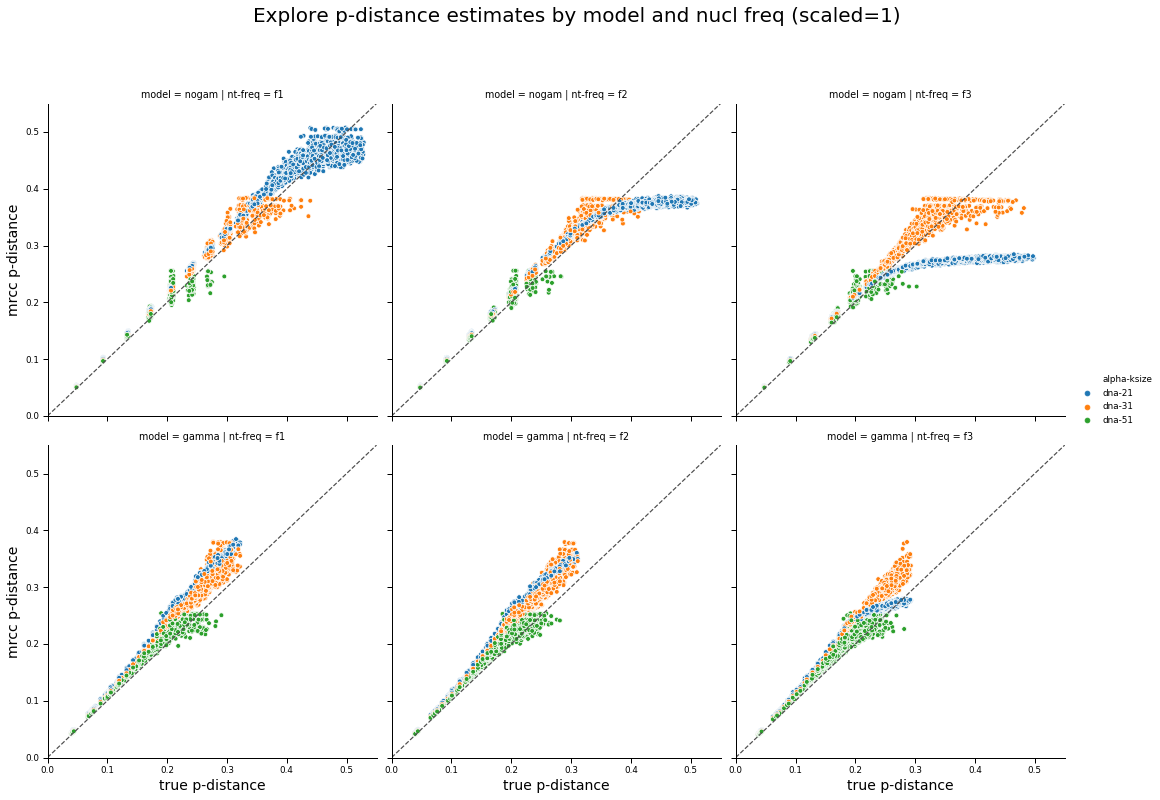

In [13]:
data_to_plot = s1DF # select dataframe to plot with

g = sns.relplot(data=data_to_plot, x="true p-distance", y="mc_pdist", col="nt-freq", row="model", hue="alpha-ksize")#, palette="GnBu_d")
g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.1), yticks=np.arange(0, 0.60, 0.1))
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("mrcc p-distance", size=14)
g.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1)", x=0.5, y=1.10, size=20)

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1)')

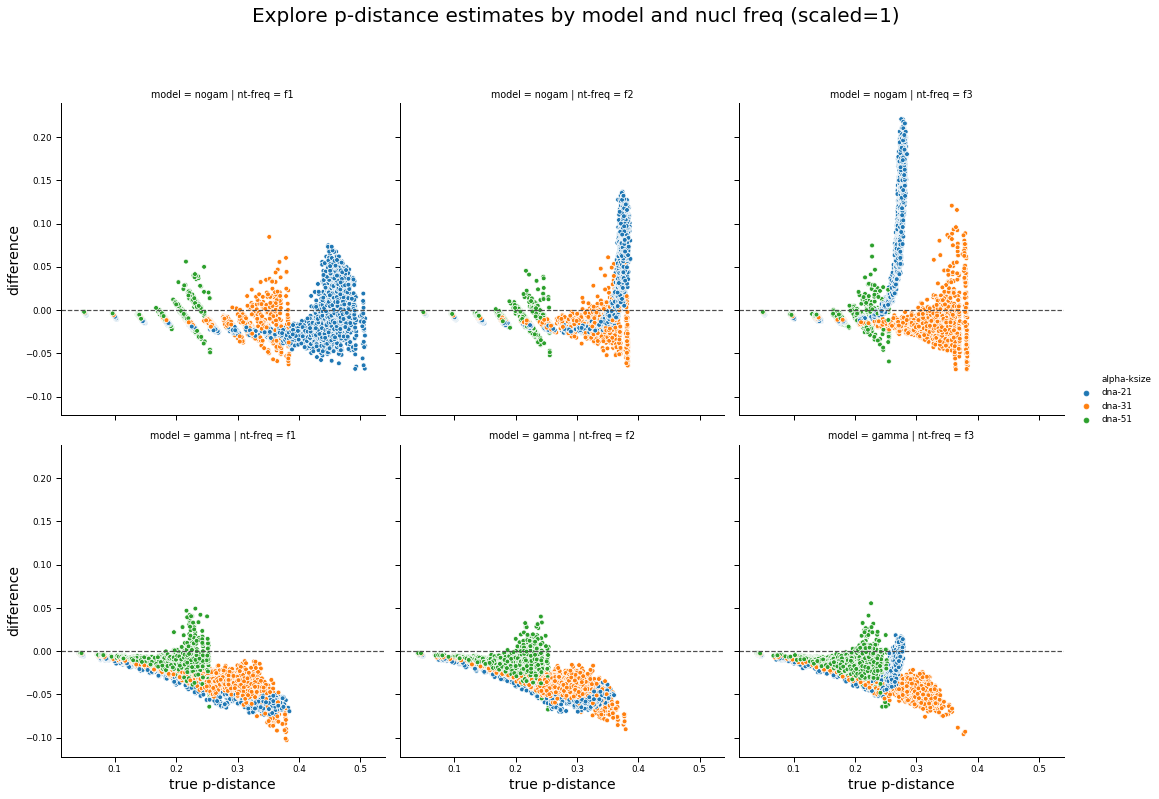

In [14]:
data_to_plot = s1DF # select dataframe to plot with
d = sns.relplot(data=data_to_plot, x="mc_pdist", y="pdist_diff", col="nt-freq", row="model", hue="alpha-ksize")
for ax in d.fig.axes:
    ax.axhline(0, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("difference", size=14)
d.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1)", x=0.5, y=1.10, size=20)

## Same plots, scaled=1000

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1000)')

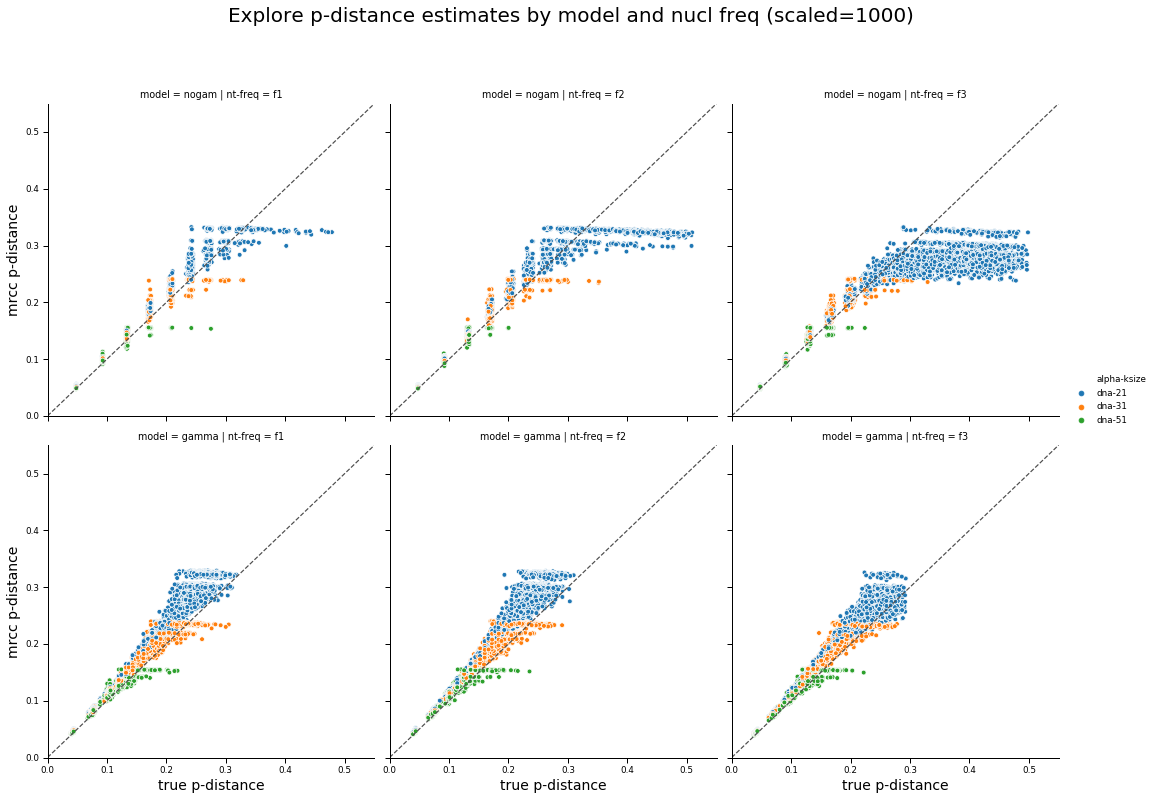

In [15]:
data_to_plot = s1000DF # select dataframe to plot with

g = sns.relplot(data=data_to_plot, x="true p-distance", y="mc_pdist", col="nt-freq", row="model", hue="alpha-ksize")#, palette="GnBu_d")
g.set(xlim=(0, 0.55), ylim=(0, 0.55), xticks=np.arange(0, 0.60, 0.1), yticks=np.arange(0, 0.60, 0.1))
xlim=None
for ax in g.fig.axes:
    if not xlim:
        xlim =ax.get_xlim()
        ylim = ax.get_ylim()
    ax.plot(xlim, ylim, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("mrcc p-distance", size=14)
g.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1000)", x=0.5, y=1.10, size=20)

Text(0.5, 1.1, 'Explore p-distance estimates by model and nucl freq (scaled=1000)')

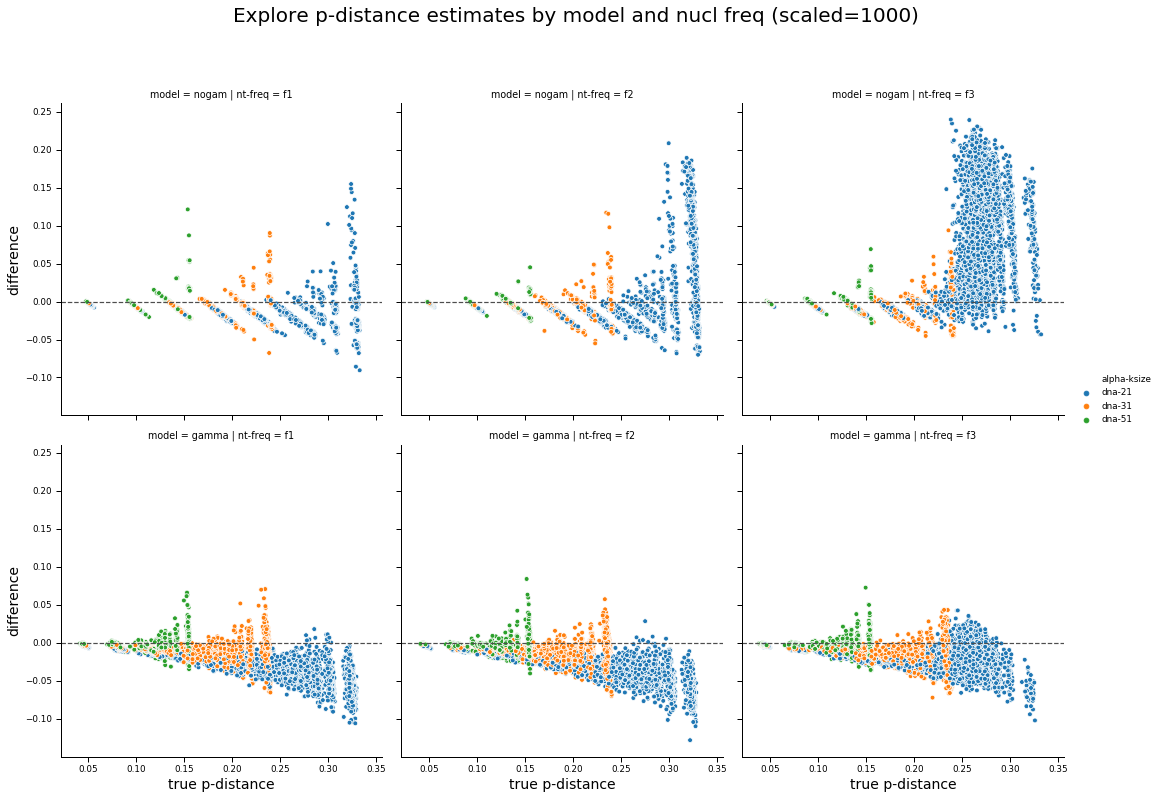

In [16]:
data_to_plot = s1000DF # select dataframe to plot with
d = sns.relplot(data=data_to_plot, x="mc_pdist", y="pdist_diff", col="nt-freq", row="model", hue="alpha-ksize")
for ax in d.fig.axes:
    ax.axhline(0, ls="--", c=".3")
    ax.set_xlabel("true p-distance", size=14)
    ax.set_ylabel("difference", size=14)
d.fig.suptitle("Explore p-distance estimates by model and nucl freq (scaled=1000)", x=0.5, y=1.10, size=20)

# Check for true p-value w/in mc_pLow and mc_pHigh

In [17]:
def p_in_ci(row):
    true_p = float(row["true p-distance"])
    low = float(row["mc_pLow"])
    high = float(row["mc_pHigh"])
    if true_p >= low and true_p <= high:
        return True
    else:
        return False

In [18]:
sDF["p_in_mrcc_ci"] = sDF.progress_apply(p_in_ci, axis=1)
#simDF.progress_apply(mrcc_maxcontain, axis=1)

100%|██████████| 155143/155143 [00:03<00:00, 39927.64it/s]


In [19]:
sDF.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,nt-freq,model,mc_pdist,pdist_diff,p_in_mrcc_ci
0,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1,0.192024,0.329152,0.329152,0.315500,...,dna-21,5082294.5,0.047855,0.051308,0.051773,f1,nogam,0.051540,-0.003686,False
1,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,100,0.193861,0.332344,0.332344,0.317521,...,dna-21,5082294.5,0.047855,0.050323,0.051893,f1,nogam,0.051108,-0.003253,False
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,...,dna-21,5082294.5,0.047855,0.047708,0.051601,f1,nogam,0.049655,-0.001800,True
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,...,dna-21,5082294.5,0.047855,0.046926,0.052235,f1,nogam,0.049581,-0.001726,True
4,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,1,0.108379,0.199794,0.199794,0.191507,...,dna-31,5082291.5,0.047855,0.050369,0.050880,f1,nogam,0.050624,-0.002770,False


In [20]:
sDF_inCI = sDF[sDF["p_in_mrcc_ci"] ==True]
sDF_inCI.head()

,comparison_name,sig1_name,sig2_name,alphabet,ksize,scaled,jaccard,max_containment,sig1_containment,sig2_containment,...,alpha-ksize,num_unique_kmers,true p-distance,mc_pLow,mc_pHigh,nt-freq,model,mc_pdist,pdist_diff,p_in_mrcc_ci
2,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,1000,0.203267,0.343331,0.343331,0.332559,...,dna-21,5082294.5,0.047855,0.047708,0.051601,f1,nogam,0.049655,-0.001800,True
3,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,21,2000,0.203029,0.344026,0.344026,0.331274,...,dna-21,5082294.5,0.047855,0.046926,0.052235,f1,nogam,0.049581,-0.001726,True
7,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,31,2000,0.112645,0.208488,0.208488,0.196811,...,dna-31,5082291.5,0.047855,0.046777,0.051920,f1,nogam,0.049349,-0.001494,True
11,data-d0.05-f1-nogam-seed11,data-d0.05-f1-nogam-seed11-seq1,data-d0.05-f1-nogam-seed11-seq2,dna,51,2000,0.037630,0.073237,0.073237,0.071838,...,dna-51,5082271.5,0.047855,0.047099,0.052887,f1,nogam,0.049993,-0.002139,True
19,data-d0.05-f1-nogam-seed44,data-d0.05-f1-nogam-seed44-seq1,data-d0.05-f1-nogam-seed44-seq2,dna,31,2000,0.112679,0.205458,0.199697,0.205458,...,dna-31,4969613.5,0.048017,0.047175,0.052421,f1,nogam,0.049798,-0.001782,True


In [21]:
sDF_inCI.shape

(42212, 23)

In [22]:
# how many true values per scaled?
#sDF_inCI.groupby("scaled").describe()
sDF_inCI.groupby(["scaled", "ksize"])[["true p-distance"]].describe()

true p-distance                                          \
                       count      mean       std       min       25%   
scaled ksize                                                           
1      21             1269.0  0.430030  0.066304  0.232130  0.407982   
       31             1432.0  0.335199  0.027700  0.258184  0.318437   
       51             2787.0  0.210061  0.019981  0.156365  0.199564   
100    21             2438.0  0.335225  0.061711  0.198623  0.275170   
       31             3083.0  0.250111  0.025167  0.166496  0.236720   
       51             3028.0  0.159757  0.023820  0.090102  0.139169   
1000   21             4572.0  0.260620  0.040784  0.042778  0.237865   
       31             4675.0  0.186733  0.040930  0.041137  0.168370   
       51             3607.0  0.109460  0.034411  0.037604  0.091205   
2000   21             6170.0  0.236155  0.052353  0.039471  0.213894   
       31             5444.0  0.159328  0.049568  0.038830  0.132335   
       51             3707.0  0.096927  0.034787  0.037604  0.073759   

                                            
                   50%       75%       max  
scaled ksize                                
1      21     0.451179  0.476208  0.525072  
       31     0.330782  0.350621  0.433619  
       51     0.207625  0.221936  0.290729  
100    21     0.342485  0.381030  0.462879  
       31     0.248375  0.264489  0.348344  
       51     0.163234  0.172571  0.231663  
1000   21     0.260587  0.280417  0.388339  
       31     0.193218  0.209995  0.284091  
       51     0.115115  0.133358  0.185223  
2000   21     0.240991  0.264597  0.364866  
       31     0.169250  0.195521  0.268316  
       51     0.096467  0.128486  0.173843

In [23]:
# totals (non-zero jaccard/containment values)
sDF.groupby(["scaled", "ksize"])[["true p-distance"]].describe()

true p-distance                                          \
                       count      mean       std       min       25%   
scaled ksize                                                           
1      21            22796.0  0.251398  0.121599  0.037604  0.166604   
       31            17656.0  0.199738  0.081439  0.037604  0.136737   
       51            10198.0  0.146268  0.058051  0.037604  0.097785   
100    21            20984.0  0.234316  0.110542  0.037604  0.158758   
       31            13664.0  0.171746  0.067737  0.037604  0.126046   
       51             6954.0  0.118293  0.047449  0.037604  0.078724   
1000   21            18100.0  0.213772  0.101071  0.037604  0.140222   
       31             9868.0  0.145017  0.059131  0.037604  0.095329   
       51             4980.0  0.098141  0.039217  0.037604  0.070060   
2000   21            16711.0  0.205629  0.098877  0.037604  0.133812   
       31             8784.0  0.136452  0.056360  0.037604  0.092315   
       51             4448.0  0.092452  0.037015  0.037604  0.048171   

                                            
                   50%       75%       max  
scaled ksize                                
1      21     0.237878  0.336739  0.528652  
       31     0.207492  0.257113  0.481708  
       51     0.154477  0.194663  0.302508  
100    21     0.228832  0.293974  0.524763  
       31     0.180586  0.226159  0.389668  
       51     0.127100  0.158286  0.274853  
1000   21     0.209435  0.263546  0.508906  
       31     0.150468  0.191600  0.352070  
       51     0.096128  0.131047  0.274853  
2000   21     0.203395  0.253373  0.508906  
       31     0.136355  0.176599  0.352070  
       51     0.092404  0.125199  0.241917